In [111]:
import pickle
import pandas as pd
import requests
from bs4 import BeautifulSoup
import sys
import os
from collections import defaultdict
import re
import json
from collections import Counter
import dateutil
from dateutil import parser
from collections import defaultdict
from __future__ import division
import datetime
%pylab inline
from numpy import arange
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


In [95]:
history_keys_dic = defaultdict(dict)
for key in data.keys():
    if 'History' in data[key]['genre']:
        if date_helper(data[key]['date']):
            year = parser.parse(data[key]['date']).year
            history_keys_dic['count'][year]= history_keys_dic['count'].get(year, 0) + 1  
history_df = pd.DataFrame.from_dict(history_keys_dic)
start = pd.datetime(1972, 1, 1)
end = pd.datetime(2016, 1, 1)
x = pd.date_range(start, end, freq='A').year
history_df_years = history_df.reindex(x)
history_df = history_df_years.fillna(0)
history_df['cumulative mean']=pd.expanding_mean(history_df['count']).shift(+1)
history_df['difference from mean']=history_df['count']/history_df['cumulative mean']

In [96]:
history_df

,count,cumulative mean,difference from mean
1972,3,NaN,NaN
1973,5,3.000000,1.666667
1974,2,4.000000,0.500000
1975,3,3.333333,0.900000
1976,4,3.250000,1.230769
1977,6,3.400000,1.764706
1978,5,3.833333,1.304348
1979,2,4.000000,0.500000
1980,6,3.750000,1.600000
1981,4,4.000000,1.000000


In [19]:
def parseint(string):
    string = str(string)
    return int(''.join([x for x in string if x.isdigit()]))

In [2]:
with open('movie_info_revised.p' ,'r') as picklefile:
    data = pickle.load(picklefile)

In [3]:
def date_helper(date):
    try:
        date = parser.parse(date)
        return True
    except: 
        pass
    return False

In [17]:
history_dic = defaultdict(dict)
history_dic = defaultdict(dict)
def get_genre(genre):
    dic = history_dic
    for key in data.keys():
        if genre in data[key]['genre']:
            if date_helper(data[key]['date']):
                year = parser.parse(data[key]['date']).year
                dic[year][key]= defaultdict(dict)
                dic[year][key]['date']= data[key]['date']
                dic[year][key]['screens']= data[key]['screens']
                dic[year][key]['opening']= data[key]['opening']
                #space_dic['space'][year].append(key,)
    frames = []
    years = []
    for year, movies in dic.items():
        years.append(year)
        frames.append(pd.DataFrame.from_dict(movies, orient='index'))
    genre = pd.concat(frames, keys=years)
    genre = genre[genre.screens != 'N/A']
    genre = genre[genre.screens != 'n/a']
    genre = genre[genre.screens != 'Error']
    genre = genre[genre.opening != 'N/A']
    genre = genre[genre.opening != 'n/a']
    genre = genre[genre.opening != 'Error']
    genre['opening'] = genre['opening'].map(lambda x: parseint(x))
    genre['screens'] = genre['screens'].map(lambda x: parseint(x))
    genre['date'] = genre['date'].map(lambda x: parser.parse(x))
    genre['normalized_opening']= genre['opening']/genre['screens']
    return genre

In [37]:
history_dic = defaultdict(dict)
for key in data.keys():
    if 'History' in data[key]['genre']:
        if date_helper(data[key]['date']):
            year = parser.parse(data[key]['date']).year
            history_dic[year][key]= defaultdict(dict)
            history_dic[year][key]['date']= data[key]['date']
            history_dic[year][key]['screens']= data[key]['screens']
            history_dic[year][key]['opening']= data[key]['opening']
                #space_dic['space'][year].append(key,)

In [13]:
genre

In [114]:
history_dic[2009]['Defiance']['screens']=1789

In [115]:
history_dic[2008]['Changeling']['screens']=2850

In [119]:
def makedf(genre):
    frames = []
    years = []
    for year, movies in genre.items():
        years.append(year)
        frames.append(pd.DataFrame.from_dict(movies, orient='index'))
    genre = pd.concat(frames, keys=years)
    genre = genre[genre.screens != 'N/A']
    genre = genre[genre.screens != 'n/a']
    genre = genre[genre.screens != 'Error']
    genre = genre[genre.opening != 'N/A']
    genre = genre[genre.opening != 'n/a']
    genre = genre[genre.opening != 'Error']
    genre['opening'] = genre['opening'].map(lambda x: parseint(x))
    genre['screens'] = genre['screens'].map(lambda x: parseint(x))
    genre['date'] = genre['date'].map(lambda x: parser.parse(x))
    genre['normalized_opening']= genre['opening']/genre['screens']
    return genre

In [117]:
genre = makedf(history_dic)

In [118]:
genre['opening'] = genre['opening'].map(lambda x: parseint(x))

In [86]:
genre['screens'] = genre['screens'].map(lambda x: parseint(x))

In [50]:
pd.set_option('display.max_rows', 1000)

In [120]:
genre

date   opening  \
1980 The Long Riders                                  1980-05-16   2351112   
     Wholly Moses!                                    1980-06-13   3625280   
1981 Reds                                             1981-12-25   2325029   
1982 Chariots of Fire                                 1982-04-09     68907   
     Inchon                                           1982-09-17   2326112   
     Night Crossing                                   1982-02-05   1547912   
     Quest for Fire                                   1982-02-12   2171303   
1983 Gandhi                                           1983-02-25    131153   
     The Right Stuff                                  1983-10-21   1601167   
1985 A Passage to India                               1985-02-01     84580   
     Amadeus                                          1985-04-05     86764   
     Revolution                                       1985-12-25     52755   
     The Killing Fields                               1985-02-01     32181   
1986 Lady Jane                                        1986-02-07     55964   
     The Mission                                      1986-10-31     40366   
1987 Cry Freedom                                      1987-11-06    318723   
     Empire of the Sun                                1987-12-25   1314509   
1988 Eight Men Out                                    1988-09-02   1129491   
     The Last Emperor                                 1988-04-15   3398662   
1989 A Dry White Season                               1989-09-20    202507   
     Casualties of War                                1989-08-18   5201261   
     Fat Man and Little Boy                           1989-10-20   1476994   
     Scandal                                          1989-04-28    658660   
     Triumph of the Spirit                            1989-12-23     33963   
     Young Einstein                                   1989-08-04   3094581   
1990 Europa Europa                                    1990-11-14     31433   
     Glory                                            1990-02-16     63661   
     Mountains of the Moon                            1990-02-23     50367   
1991 JFK                                              1991-12-20   5223658   
1993 Geronimo: An American Legend                     1993-12-10   4018452   
     Gettysburg                                       1993-10-08    913617   
     King of the Hill                                 1993-08-20     46476   
     M. Butterfly                                     1993-10-01     57280   
     Tombstone                                        1993-12-25   6454752   
1994 Princess Caraboo                                 1994-09-16   1005287   
     Quiz Show                                        1994-10-07    757714   
     Schindler's List                                 1994-02-04    656636   
     The Advocate                                     1994-08-24     30892   
1995 Apollo 13                                        1995-06-30  25353380   
     Braveheart                                       1995-05-24   9938276   
     Jefferson in Paris                               1995-03-31     61349   
1996 Get on the Bus                                   1996-10-16   2837711   
     Some Mother's Son                                1996-12-25    114309   
     Stonewall                                        1996-09-03     74052   
     The Crucible                                     1996-11-27     62995   
1997 Amistad                                          1997-12-25   4661866   
     Bent                                             1997-11-26    109243   
     Evita                                            1997-01-10   8381055   
     Kama Sutra: A Tale of Love                       1997-02-28     53499   
     Kundun                                           1997-12-25     72095   
     Mrs Brown                                        1997-07-18     76268   
    

In [140]:
genre1 = genre[genre.screens > 50]

In [150]:
genre2 = genre[genre.screens > 1000]

In [130]:
genre[40:62]

date   opening  screens  \
2005 The Game of Their Lives       2005-04-22    175336       64   
     The Greatest Game Ever Played 2005-09-30   3657322     1014   
2006 Catch a Fire                  2006-10-27   2026997      136   
     Flags of Our Fathers          2006-10-20  10245190     1876   
     Marie Antoinette              2006-10-20   5361050      859   
     Munich                        2006-01-06   6040860      532   
     One Night with the King       2006-10-13   4120497      909   
     The Good Shepherd             2006-12-22   9912110     2215   
     World Trade Center            2006-08-09  18730762     2957   
2007 A Mighty Heart                2007-06-22   3948863     1355   
     Amazing Grace                 2007-02-23   4054542      791   
     Elizabeth: The Golden Age     2007-10-12   6153075     2001   
     September Dawn                2007-08-24    601857      857   
2008 Cadillac Records              2008-12-05   3445559      687   
     Changeling                    2008-10-31   9351560     2850   
     Passchendaele                 2008-10-17    847522      204   
     The Duchess                   2008-10-10   4562675     2808   
     The Other Boleyn Girl         2008-02-29   8203061     1166   
     W.                            2008-10-17  10505668     2030   
2009 Defiance                      2009-01-16   8911827     1789   
     Invictus                      2009-12-11   8611147     2125   
     Milk                          2009-01-30   1481155      882   

                                    normalized_opening  
2005 The Game of Their Lives               2739.625000  
     The Greatest Game Ever Played         3606.826430  
2006 Catch a Fire                         14904.389706  
     Flags of Our Fathers                  5461.188699  
     Marie Antoinette                      6241.036088  
     Munich                               11355.000000  
     One Night with the King               4533.000000  
     The Good Shepherd                     4474.993228  
     World Trade Center                    6334.380115  
2007 A Mighty Heart                        2914.290037  
     Amazing Grace                         5125.843236  
     Elizabeth: The Golden Age             3075.000000  
     September Dawn                         702.283547  
2008 Cadillac Records                      5015.369723  
     Changeling                            3281.249123  
     Passchendaele                         4154.519608  
     The Duchess                           1624.884259  
     The Other Boleyn Girl                 7035.215266  
     W.                                    5175.205911  
2009 Defiance                              4981.457239  
     Invictus                              4052.304471  
     Milk                                  1679.314059

In [ ]:
trend=genre1[42:59]

In [158]:
trend=genre2[10:79]

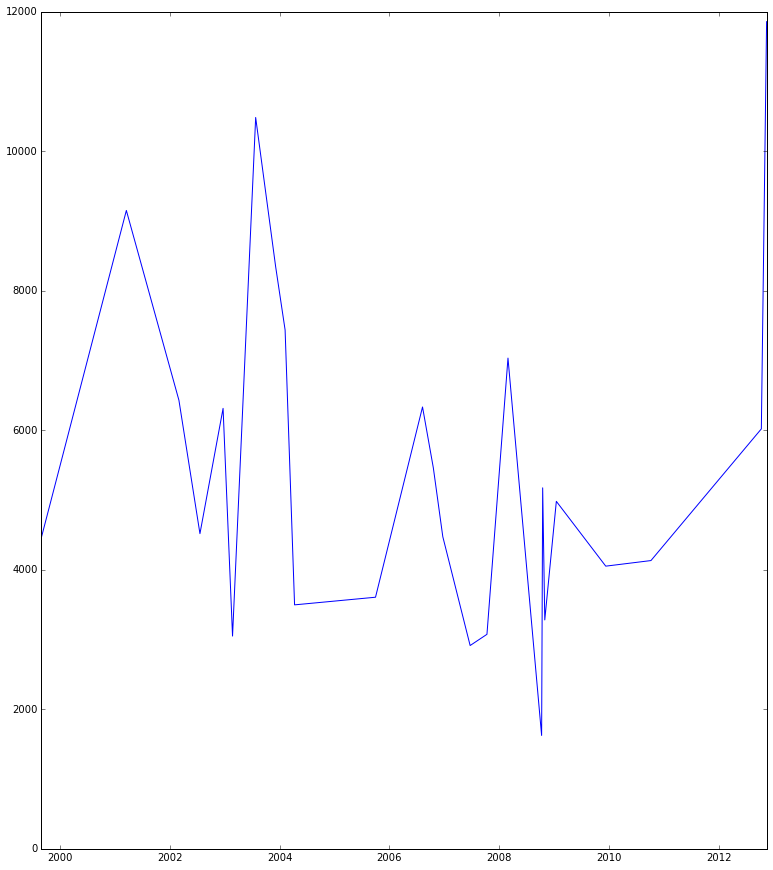

In [155]:

figure(figsize=(13,15))
trend = trend.sort(['date'])
plt.plot(trend['date'], trend['normalized_opening'])

In [156]:
trend

date   opening  screens  \
1999 The 13th Warrior              1999-08-27  10267756     2306   
2001 Enemy at the Gates            2001-03-16  13810266     1509   
2002 We Were Soldiers              2002-03-01  20212543     3143   
     K-19: The Widowmaker          2002-07-19  12778459     2828   
     Gangs of New York             2002-12-20   9496870     1504   
2003 Gods and Generals             2003-02-21   4675246     1533   
     Seabiscuit                    2003-07-25  20854735     1989   
     The Last Samurai              2003-12-05  24271354     2908   
2004 Miracle                       2004-02-06  19377577     2605   
     The Alamo                     2004-04-09   9124701     2609   
2005 The Greatest Game Ever Played 2005-09-30   3657322     1014   
2006 World Trade Center            2006-08-09  18730762     2957   
     Flags of Our Fathers          2006-10-20  10245190     1876   
     The Good Shepherd             2006-12-22   9912110     2215   
2007 A Mighty Heart                2007-06-22   3948863     1355   
     Elizabeth: The Golden Age     2007-10-12   6153075     2001   
2008 The Other Boleyn Girl         2008-02-29   8203061     1166   
     The Duchess                   2008-10-10   4562675     2808   
     W.                            2008-10-17  10505668     2030   
     Changeling                    2008-10-31   9351560     2850   
2009 Defiance                      2009-01-16   8911827     1789   
     Invictus                      2009-12-11   8611147     2125   
2010 Secretariat                   2010-10-08  12694770     3072   
2012 Argo                          2012-10-12  19458109     3232   
     Lincoln                       2012-11-16  21049406     1775   

                                    normalized_opening  
1999 The 13th Warrior                      4452.626193  
2001 Enemy at the Gates                    9151.932406  
2002 We Were Soldiers                      6430.971365  
     K-19: The Widowmaker                  4518.549859  
     Gangs of New York                     6314.408245  
2003 Gods and Generals                     3049.736464  
     Seabiscuit                           10485.035194  
     The Last Samurai                      8346.407840  
2004 Miracle                               7438.609213  
     The Alamo                             3497.394021  
2005 The Greatest Game Ever Played         3606.826430  
2006 World Trade Center                    6334.380115  
     Flags of Our Fathers                  5461.188699  
     The Good Shepherd                     4474.993228  
2007 A Mighty Heart                        2914.290037  
     Elizabeth: The Golden Age             3075.000000  
2008 The Other Boleyn Girl                 7035.215266  
     The Duchess                           1624.884259  
     W.                                    5175.205911  
     Changeling                            3281.249123  
2009 Defiance                              4981.457239  
     Invictus                              4052.304471  
2010 Secretariat                           4132.412109  
2012 Argo                                  6020.454517  
     Lincoln                              11858.820282

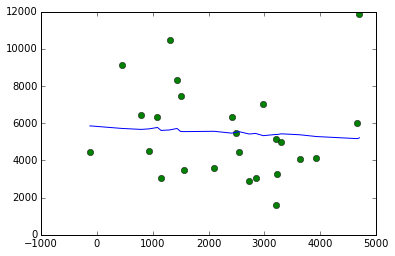

In [157]:
trend['time_delta']=trend['date'].apply(lambda x: str(x - parser.parse('2000-01-01')))
trend['time_delta_num'] = trend['time_delta'].str.replace(r'days[\s\S]+', '').apply(lambda x: int(x))

def sort_season(x):
    if x in [11, 12, 1]:
        return 4
    if x in [5, 6, 7, 8]:
        return 2
    if x in [9, 10,]:
        return 3
    if x in [2, 3, 4,]:
        return 1

trend['season']=trend['date'].apply(lambda x: sort_season(x.month))
from patsy import dmatrices
from patsy import dmatrix
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
#plot_data = trend
y, X = dmatrices('normalized_opening ~ time_delta_num + season', data = trend.reset_index(), return_type= 'dataframe')
model = sm.OLS(y, X)
fitted = model.fit()
plot(X['time_delta_num'], y, 'go')
plot(X['time_delta_num'], fitted.fittedvalues, 'b')